In [3]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
    custom_plots,
    compress_repeated_epochs
)
from ripple_heterogeneity.readout import assembly_multi_region, assembly_multi_region_member_ratemap_corr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import os
import nelpy as nel
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator
import glob
import pickle
import itertools
from ripple_heterogeneity.place_cells import maps
from scipy import stats

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## locate sessions that were ran with assembly_multi_region

In [4]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_50ms_dt_10ms_z_dt"
sessions = glob.glob(save_path + os.sep + "*.pkl")
sessions_df = pd.DataFrame()
sessions_df["basepath"] = sessions

In [5]:
sessions_df

,basepath
0,Z:\home\ryanh\projects\ripple_heterogeneity\as...
1,Z:\home\ryanh\projects\ripple_heterogeneity\as...
2,Z:\home\ryanh\projects\ripple_heterogeneity\as...
3,Z:\home\ryanh\projects\ripple_heterogeneity\as...
4,Z:\home\ryanh\projects\ripple_heterogeneity\as...
...,...
113,Z:\home\ryanh\projects\ripple_heterogeneity\as...
114,Z:\home\ryanh\projects\ripple_heterogeneity\as...
115,Z:\home\ryanh\projects\ripple_heterogeneity\as...
116,Z:\home\ryanh\projects\ripple_heterogeneity\as...


In [ ]:
# assembly_multi_region_member_ratemap_corr.run(
#     r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_50ms_dt_10ms_z_dt\Z__Data_Kenji_ec014.427_456.pkl"
# )


In [33]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_member_ratemap_corr_v3"

batch_analysis.run(
    sessions_df,
    save_path,
    assembly_multi_region_member_ratemap_corr.run,
    parallel=False,
    skip_if_error=False,
    verbose=False,
)

label_df = assembly_multi_region_member_ratemap_corr.load_results(save_path)

100%|██████████| 118/118 [00:11<00:00, 10.64it/s]


In [34]:
label_df["cross_label"] = label_df.deepSuperficial_ref + "_" + label_df.brainRegion_tar
label_df.loc[(label_df.is_member_sig_ref == True) & (label_df.is_member_sig_tar == True), "ismembers"] = "members"
label_df.loc[(label_df.is_member_sig_ref == False) | (label_df.is_member_sig_tar == False), "ismembers"] = "nonmembers"

label_df

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
0,0.0,16.0,59.0,87.0,CA1,MEC,Deep,unknown,False,False,...,3.885635,25.029567,513.386668,2.856798,0.102836,2315.0,66.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers
1,0.0,17.0,59.0,89.0,CA1,MEC,Deep,unknown,False,False,...,4.015705,25.029567,321.883478,2.856798,0.402561,2315.0,90.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers
2,0.0,18.0,59.0,90.0,CA1,MEC,Deep,unknown,False,False,...,3.162141,25.029567,46.115906,2.856798,1.672382,2315.0,692.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers
3,0.0,19.0,59.0,91.0,CA1,MEC,Deep,unknown,False,False,...,5.008917,25.029567,1263.084566,2.856798,0.123189,2315.0,29.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers
4,0.0,20.0,59.0,92.0,CA1,MEC,Deep,unknown,False,False,...,3.205392,25.029567,59.650511,2.856798,1.120881,2315.0,455.0,Z:\Data\AYAold\AYA7\day19,Deep_MEC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715418,56.0,32.0,75.0,40.0,CA1,PFC,Deep,unknown,False,False,...,1.254223,16.714412,0.405608,1.669819,14.307801,347.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers
1715419,57.0,32.0,78.0,40.0,CA1,PFC,Deep,unknown,True,False,...,1.254223,2.245284,0.405608,7.739809,14.307801,3195.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers
1715420,58.0,32.0,81.0,40.0,CA1,PFC,Deep,unknown,False,False,...,1.254223,24.840702,0.405608,1.615155,14.307801,224.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers
1715421,59.0,32.0,84.0,40.0,CA1,PFC,Deep,unknown,False,False,...,1.254223,10.593165,0.405608,1.818480,14.307801,698.0,16016.0,Z:\Data\ORproject\OR18\day3,Deep_PFC,nonmembers


In [ ]:
label_df.query("ismembers=='members'").basepath.value_counts()

In [36]:
label_df.keys()

Index(['idx_ref', 'idx_tar', 'UID_ref', 'UID_tar', 'brainRegion_ref',
       'brainRegion_tar', 'deepSuperficial_ref', 'deepSuperficial_tar',
       'is_member_sig_ref', 'is_member_sig_tar', 'assembly_n', 'spatial_corr',
       'spatial_info_ref', 'spatial_info_tar', 'spatial_sparsity_ref',
       'spatial_sparsity_tar', 'peak_rate_ref', 'peak_rate_tar',
       'n_spikes_ref', 'n_spikes_tar', 'basepath', 'cross_label', 'ismembers'],
      dtype='object')

<AxesSubplot:xlabel='peak_rate_ref', ylabel='n_spikes_ref'>

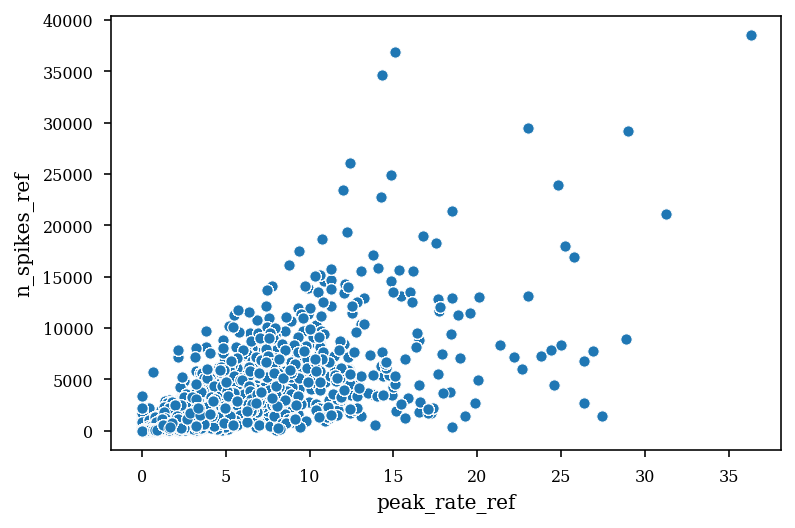

In [40]:
sns.scatterplot(data=label_df, x="peak_rate_ref",y="n_spikes_ref")

In [49]:
label_df.query("ismembers == 'members' & cross_label == 'Superficial_MEC' & n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2").head(10)

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
39613,48.0,52.0,72.0,101.0,CA1,MEC,Superficial,unknown,True,True,...,0.384644,0.256474,0.420361,20.109009,11.054615,13009.0,5148.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
39622,48.0,61.0,72.0,111.0,CA1,MEC,Superficial,unknown,True,True,...,0.438069,0.256474,0.563398,20.109009,6.435479,13009.0,4637.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
39625,48.0,64.0,72.0,114.0,CA1,MEC,Superficial,unknown,True,True,...,0.904617,0.256474,3.575986,20.109009,2.521163,13009.0,476.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
39657,48.0,96.0,72.0,149.0,CA1,MEC,Superficial,unknown,True,True,...,1.033590,0.256474,3.293249,20.109009,3.622947,13009.0,637.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
39658,48.0,97.0,72.0,151.0,CA1,MEC,Superficial,unknown,True,True,...,0.688407,0.256474,2.333315,20.109009,3.292318,13009.0,1062.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
39678,48.0,117.0,72.0,176.0,CA1,MEC,Superficial,unknown,True,True,...,0.797792,0.256474,1.534032,20.109009,4.255509,13009.0,1957.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
870562,151.0,307.0,296.0,526.0,CA1,MEC,Superficial,unknown,True,True,...,1.543306,5.435052,1.840206,2.095586,5.136987,2362.0,5389.0,Z:\Data\HMC1\day13,Superficial_MEC,members
897271,246.0,277.0,420.0,464.0,CA1,MEC,Superficial,unknown,True,True,...,1.468115,0.911970,0.890059,10.018307,15.340209,9906.0,12234.0,Z:\Data\HMC1\day13,Superficial_MEC,members
1301877,93.0,150.0,150.0,216.0,CA1,MEC,Superficial,unknown,True,True,...,1.189114,7.324945,1.277648,3.333636,6.352611,889.0,3798.0,Z:\Data\HMC1\day14,Superficial_MEC,members
1301893,93.0,166.0,150.0,240.0,CA1,MEC,Superficial,unknown,True,True,...,1.110939,7.324945,0.427608,3.333636,15.795777,889.0,13480.0,Z:\Data\HMC1\day14,Superficial_MEC,members


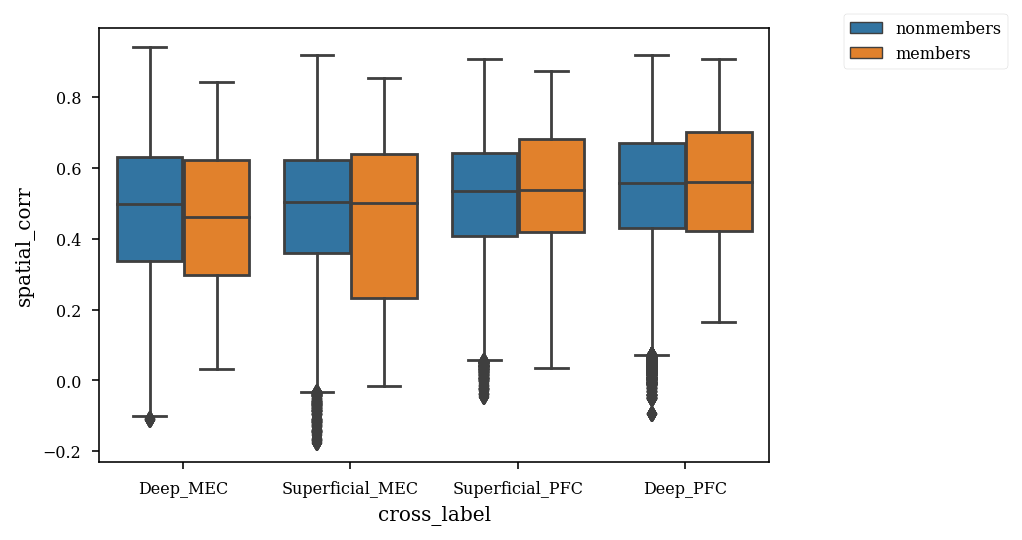

In [52]:
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2"
sns.boxplot(data=label_df.query(idx),y="spatial_corr",x="cross_label",hue="ismembers")
# sns.stripplot(data=label_df.query(idx),y="spatial_corr",x="cross_label",hue="ismembers",dodge=True,color="k",size=5)

plt.legend(bbox_to_anchor=(1.1, 1.05))


<AxesSubplot:xlabel='cross_label', ylabel='spatial_corr'>

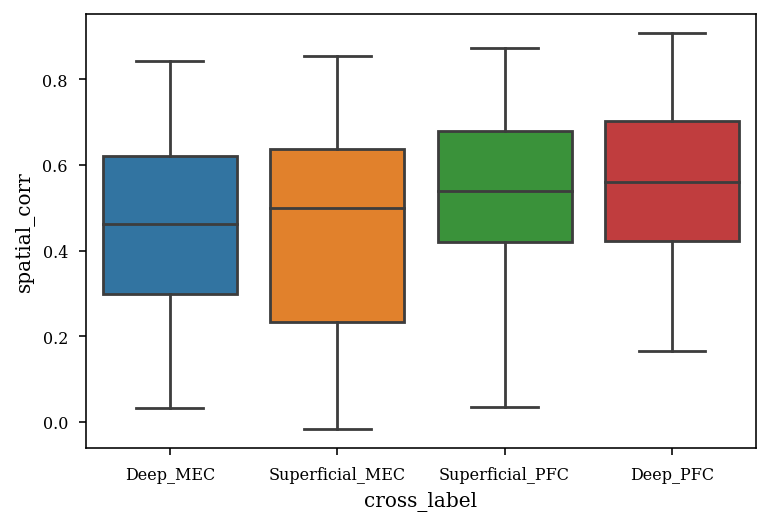

In [51]:
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & ismembers=='members'"

sns.boxplot(data=label_df.query(idx),y="spatial_corr",x="cross_label")


<AxesSubplot:xlabel='cross_label', ylabel='spatial_corr'>

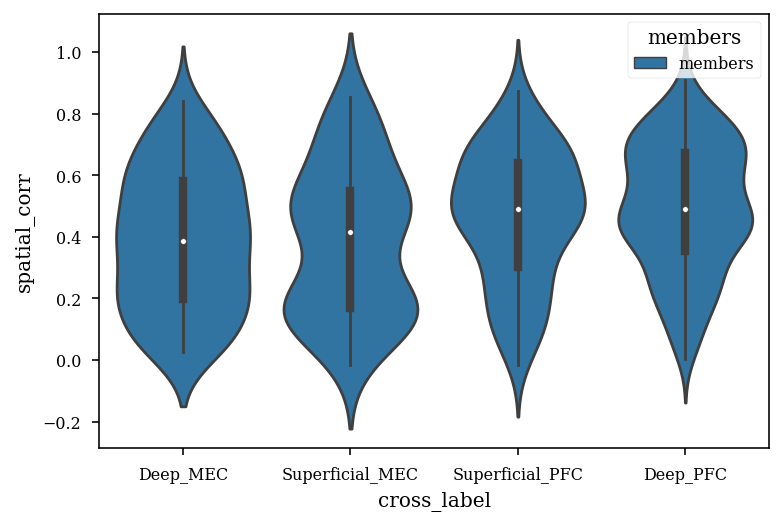

In [31]:
sns.violinplot(data=label_df.query("ismembers == 'members'"),y="spatial_corr",x="cross_label",hue="members")
